# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# 10. Feature Selection

### `VarianceThreshold`

In [2]:
from sklearn.feature_extraction import DictVectorizer
data = [
    {'age': 4, 'height': 96.0},
    {'age': 1, 'height':73.9},
    {'age': 3, 'height':88.9},
    {'age': 2, 'height':81.6}
]

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)

# Compute variance along axis=0 (variance calculated for each column)
np.var(data_transformed, axis = 0)

array([ 1.25 , 67.735])

In [3]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

### `SelectKBest`
- Selects `k` highest scoring features based on function and removes the others.

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

In [5]:
X_california, y_california = fetch_california_housing(return_X_y=True)
X, y = X_california[:2000, :], y_california[:2000]
print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (2000, 8)


Let's select 3 most important features. Since it is a regression problem we can
only use following two functions:
- `mutual_info_regression`
- `f_regression`

In [6]:
skb = SelectKBest(mutual_info_regression, k=3)
X_new = skb.fit_transform(X, y)
X_new.shape

(2000, 3)

In [7]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

### `SelectPercentile`
- Keeps top percentile of features and drops the rest.

In [8]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile=30)

print('Shape of X before: ', X.shape)

X_new = sp.fit_transform(X, y)
print('Shape of X after: ', X_new.shape)

Shape of X before:  (2000, 8)
Shape of X after:  (2000, 3)


### `GenericUnivariateSelect`
- It applies univariate feature selection with a certain strategy.

In [9]:
from sklearn.feature_selection import GenericUnivariateSelect

# GETTING RESULTS SAME AS USING SelectKBest
gus = GenericUnivariateSelect(mutual_info_regression, mode='k_best', param=3)
X_new = gus.fit_transform(X, y)
print('Shape of X before: ', X.shape)
print('Shape of X after: ', X_new.shape)

Shape of X before:  (2000, 8)
Shape of X after:  (2000, 3)


### `RFE` (Recursive Feature Elimination)
- **STEP 1**: Fits a model
- **STEP 2**: Ranks the features, then removes one or more features (depending upon
  the `step` parameter)

In [10]:
from sklearn.feature_selection import RFE
from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector.fit(X, y)

# Marks which features are selected
print(selector.support_)

# Printing ranking of features
# Features ranked 1 are selected and rank 2 onwards aren't 
print(selector.ranking_)

[ True False False False False False  True  True]
[1 5 4 3 6 2 1 1]


In [11]:
X_new = selector.transform(X)
X_new.shape

(2000, 3)

### `SelectFromModel`
- Selects desired number of features (as specifies by `max_features` paramter).

In [12]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X, y)

print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top 3 features: {np.argsort(estimator.coef_)[-3:]}')

model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)

print(f'Shape of feature after selection: {X_new.shape}')

Coefficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
Shape of feature after selection: (2000, 3)


### `SequentialFeatureSelector`
- Performance feature selection by selecting deselecting features one-by-one greedily.

In [13]:
from sklearn.feature_selection import SequentialFeatureSelector

estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]


# 11. PCA

### Generating Synthetic Data

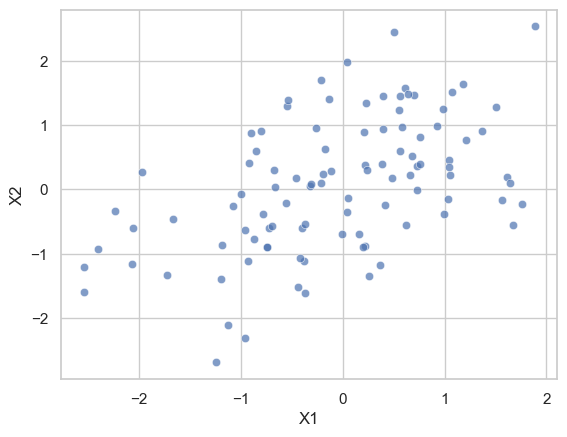

In [14]:
np.random.seed(0)
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # covariance matrix
X = np.random.multivariate_normal(mean, cov, 100)

# Plot scatter plot
sns.scatterplot(x=X[:, 0], y=X[:, 1], color='b', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [16]:
print(f'The {pca.n_components_} principle axes are\n{pca.components_}')

The 2 principle axes are
[[ 0.69244223  0.72147332]
 [ 0.72147332 -0.69244223]]


In [17]:
print('Explained variance by each component: ', pca.explained_variance_)

Explained variance by each component:  [1.58286872 0.52070439]


In [18]:
print('Mean across each component x1, x2 is: ', pca.mean_)

Mean across each component x1, x2 is:  [-0.07055996  0.07221871]


### Reducing Dimensions
- The components that are least important i.e. their explained **variance is low, are removed**.

In [19]:
# REDUCING DIMENSIONS FROM 2 TO 1

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.fit_transform(X)
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', X_pca.shape)

Shape before PCA:  (100, 2)
Shape after PCA:  (100, 1)


# 12. Chaining Transformers

### Pipeline
- Intermediate steps must be 'transformers', that is they must implement `fit`
  and `transform` methods.
- Final estimator only needs to implement `fit`.

### Creating Pipeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
estimator = [
    ('simpleImputer', SimpleImputer()),
    ('standardScalar', StandardScaler())
]
pipe = Pipeline(steps = estimator)

In [21]:
# MAKING THE ABOVE PIPELINE USING make_pipeline
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler()
)

### Accessing Steps in a Pipeline

In [22]:
from sklearn.decomposition import PCA
estimator = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
]
pipe = Pipeline(steps = estimator)

In [23]:
pipe.steps

[('simpleImputer', SimpleImputer()),
 ('pca', PCA()),
 ('regressor', LinearRegression())]

In [24]:
# ACCESSING ESTIMATORS IN 4 WAYS

# 1
print(pipe.named_steps.pca)

# 2
print(pipe['pca'])

# 3
print(pipe.steps[1])

# 4
print(pipe[1])

PCA()
PCA()
('pca', PCA())
PCA()


### Accessing Parameters in a Pipeline

In [25]:
estimator = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
]
pipe = Pipeline(steps = estimator)

pipe.set_params(pca__n_components=2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

### `GridSearch` with Pipeline

In [26]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    imputer=[
        'passthrough',
        SimpleImputer(),
        KNNImputer()
    ],
    clf=[SVC(), LogisticRegression()],
    clf__C=[0.1, 10, 100]
)
grid_search = GridSearchCV(pipe, param_grid)

### Caching Transformers

In [27]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()

In [28]:
estimator = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA(2)),
    ('regressor', LinearRegression())
]
pipe = Pipeline(steps = estimator, memory=tempDirPath)

# 13. Visualizing Pipelines

In [29]:
from sklearn import set_config

set_config(display='text')
pipe

Pipeline(memory=<TemporaryDirectory 'C:\\Users\\91820\\AppData\\Local\\Temp\\tmp14wjq076'>,
         steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

In [30]:
set_config(display='diagram')
pipe

Pipeline(memory=<TemporaryDirectory 'C:\\Users\\91820\\AppData\\Local\\Temp\\tmp14wjq076'>,
         steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

# 14. Handling Imbalanced Data
- Imbalanced datasets are those where **one class is very less represented than
  the other class**. This kind of data results in less efficient ML algorithms.
- There are two main approaches to handle imbalanced data:
  - Undersampling
  - Oversampling

![image.png](https://i.stack.imgur.com/FEOjd.jpg)

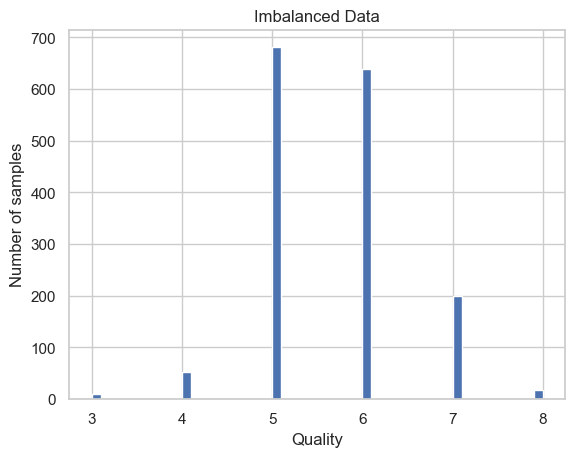

In [34]:
wine_data = pd.read_csv('./data/winequality-red.csv', sep=';')

wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.title('Imbalanced Data')
plt.show()

### Undersampling
- Undersampling refers to sampling from **majority class**.

In [38]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state=0)
X_rus, y_rus = undersample.fit_resample(X, y)

print('Original Data Shape: ', Counter(y))
print('Resample Data Shape: ', Counter(y_rus))

Original Data Shape:  Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample Data Shape:  Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


The class with the **least number of samples is '3'**. Hence all the other class samples are reduced to the number of samples in the least class.

### Oversampling
- Oversampling refers to **replicating some points from the minority class** in order to increase the cardinality of the minority class.

In [39]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Original Data Shape: ', Counter(y))
print('Resample Data Shape: ', Counter(y_ros))

Original Data Shape:  Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample Data Shape:  Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


#### Oversampling using SMOTE
- SMOTE is Synthetic Minority Oversampling Technique

In [40]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)
print('Resample Data Shape: ', Counter(y_sm))

Resample Data Shape:  Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})
